In [4]:
from google.colab import drive
drive._mount('/content/drive')   # add _ for connect different account google 

Mounted at /content/drive


In [ ]:
!pip install segmentation-models-3D

In [5]:
%cd /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic

/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic


In [7]:
# train model và show ra history
import train

# name in [unet-v1, unet-v3, unet++]
model_and_path = train.load_model("unet++",False)
H, model = train.fit_model(model_and_path)

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.8110 - acc: 0.9072 - mean_io_u: 0.7683 - dice_coef: 0.8298 - dice_coef_v2: 0.8298
Epoch 00001: saving model to /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic/model/unet_nested_v2.h5
100/100 [==============================] - 446s 4s/step - loss: 0.8110 - acc: 0.9072 - mean_io_u: 0.7683 - dice_coef: 0.8298 - dice_coef_v2: 0.8298 - val_loss: 0.6695 - val_acc: 0.9411 - val_mean_io_u: 0.8729 - val_dice_coef: 0.9408 - val_dice_coef_v2: 0.9408 - lr: 1.0000e-04
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.6062 - acc: 0.9459 - mean_io_u: 0.9071 - dice_coef: 0.9339 - dice_coef_v2: 0.9339
Epoch 00002: saving model to /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic/model/unet_nested_v2.h5
100/100 [==============================] - 134s 1s/step - loss: 0.6062 - acc: 0.9459 - mean_io_u: 0.9071 - dice_coef: 0.9339 - dice_coef_v2: 0.9339 - val_loss: 0.5403 - val_acc: 0.9

KeyboardInterrupt: ignored

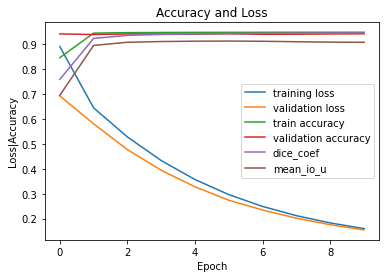

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import config 
fig = plt.figure()
numOfEpoch = config.EPOCH
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='train accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['dice_coef'], label='dice_coef')
plt.plot(np.arange(0, numOfEpoch), H.history['mean_io_u'], label='mean_io_u')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

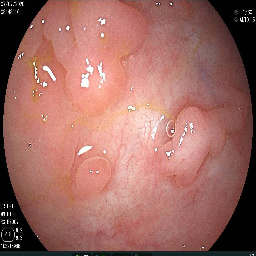

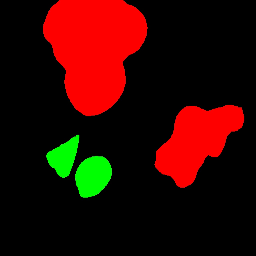

In [ ]:
# test_image_list = [os.path.join(config.TEST_PATH, f'{x}') for x in os.listdir(config.TEST_PATH)]
import config
from data_prepare import *
from google.colab.patches import cv2_imshow
import cv2
import train

# model = train.load_model("unet-v1")
# model.summary()

test_img = read_image("/content/drive/MyDrive/20211/prj3/data/train/train/0bd55b1393e2ef89424de1556a26c8eb.jpeg")  
mask_img = read_image("/content/drive/MyDrive/20211/prj3/data/train_gt/train_gt/0bd55b1393e2ef89424de1556a26c8eb.jpeg")    
cv2_imshow(test_img*256)
cv2_imshow(mask_img*256)
predict = model.predict(np.expand_dims(test_img, axis=0))[:]    

# predict.shape => [1,256,256,3] chiều cuối cùng là one hot [0-1,0-1,0-1] tương ứng với score onehot [1,0,0],[0,1,0],[0,0,1]
# predict[0,180,90,:]  => array([0.37815863, 0.31078163, 0.3110597 ], dtype=float32)

In [ ]:
predict[0][20][90]

array([0.9821807 , 0.3151461 , 0.05165661], dtype=float32)

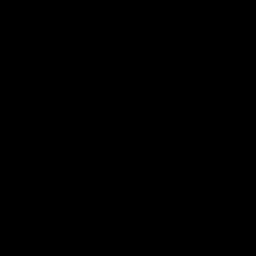

In [ ]:
predict_max = np.argmax(predict, axis=-1)   # (1,256,256)    nso trả về vị trí max -> thành gray
# ví dụ [0.37815863, 0.31078163, 0.3110597 ] -> 0 , giá trị chỉ thay dổi 0,1,2 
cv2_imshow(predict_max[0]* 100)

In [ ]:
img =predict_max[0]
test = np.zeros((256,256,3), dtype=np.int64)
for i in range(255):
  for j in range(255):
    if img[i,j] == 1:
      test[i,j] = [0,0,255]
    if img[i,j] == 2:
      test[i,j] = [0,255,0] 

cv2_imshow(test)

print(test.shape)

resized_img = cv2.resize(test, (1280, 995), interpolation=cv2.INTER_LINEAR_EXACT)

cv2_imshow(resized_img)

In [ ]:
import test
import train

# nhớ sao lưu trước khi run test
# model = train.load_model("unet-v1")
test.predict(model)

done batch 20 image, current 20
done batch 20 image, current 40
done batch 20 image, current 60
done batch 20 image, current 80
done batch 20 image, current 100
done batch 20 image, current 120
done batch 20 image, current 140
done batch 20 image, current 160
done batch 20 image, current 180
done batch 20 image, current 200


In [ ]:
!python submit_origin.py